In [25]:
# Down-sampling involves randomly removing observations from the majority class 
# to prevent its signal from dominating the learning algorithm.
# Most common method is resampling without replacement

# - First, we'll separate observations from each class into different DataFrames.
# - Next, we'll resample the majority class without replacement, setting the number 
# of samples to match that of the minority class.
# - Finally, we'll combine the down-sampled majority class DataFrame with 
# the original minority class DataFrame.

In [26]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [27]:
# module for resampling
from sklearn.utils import resample

In [28]:
# os.getcwd()

In [29]:
# os.listdir(os.getcwd())

In [30]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\all_param.csv")
all_param_df.shape


(39624, 351)

In [31]:
# separate classes in dataframes of success/failure
df_fail = all_param_df[all_param_df.suc_class==0]
df_succ = all_param_df[all_param_df.suc_class==1]

In [32]:
df_fail.shape

(38818, 351)

In [33]:
df_succ.shape

(806, 351)

In [34]:
# Downsample Majority class
df_fail_downsample = resample(df_fail, replace=False, n_samples=1000, random_state=2)

# combine success with downsampled majority class into new dataframe
df_downsampled = pd.concat([df_fail_downsample, df_succ])

# display new class counts
df_downsampled.suc_class.value_counts()

0    1000
1     806
Name: suc_class, dtype: int64

In [35]:
# # reindex the new upsampled dataframe
# df_upsampled.reindex()

In [36]:
# df_upsampled

In [37]:
# # read the csv y_data file into Pandas 
# y_parm_df = pd.read_csv("reduced_data\\y_params.csv")
# y_parm_df.shape

In [38]:
# using binary classification for logistic regression
y_class = df_downsampled['suc_class']

In [39]:
y_class

13716    0
4622     0
1350     0
30223    0
23274    0
        ..
39619    1
39620    1
39621    1
39622    1
39623    1
Name: suc_class, Length: 1806, dtype: int64

In [40]:
# create new X parameters df
x_data = df_downsampled.drop(['appid','maxccu','success_class','suc_class','followers']  , axis=1)

In [41]:
x_data.shape


(1806, 346)

In [42]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [43]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
# Train model
y = y_train
X = X_train

clf_2 = LogisticRegression(max_iter=1000).fit(X, y)

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_2.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_2.score(X_test, y_test)}")

Training Data Score: 0.9431314623338257
Testing Data Score: 0.8141592920353983


In [46]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_2.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       248
           1       0.81      0.77      0.79       204

    accuracy                           0.81       452
   macro avg       0.81      0.81      0.81       452
weighted avg       0.81      0.81      0.81       452



In [47]:
# thinking about baseline results:
# Support is balanced due to sampling adjustments
# Percision: for no success: 89%, for successful games: 87%
# Recall: Fraction of positives found, 89% for 0, 87% for 1
# f1 score: 88%

<AxesSubplot:>

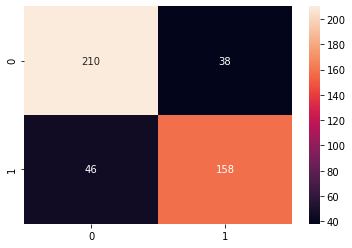

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [91]:
# Co-efficient importance

print(x_data.columns.shape, clf_2.coef_.shape)
new_col = np.reshape(clf_2.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(346,) (1, 346)
(346,)


,0,1
261,tagilluminati,1.356419e-01
271,tagleveleditor,1.326590e-01
227,tagwalkingsimulator,1.223440e-01
195,tagkickstarter,1.149858e-01
182,tagmechs,1.112099e-01
152,tagcolorful,1.088273e-01
66,tagtactical,1.086205e-01
160,tagjrpg,9.833944e-02
322,tagagriculture,9.228788e-02
53,tagsoccer,9.097675e-02
